# Qiskit Assignment 1
## Practice with Pauli gates, statevector, etc. ?
This assignment is meant ...

### Learning Objectives
1. Become familiar using the statevector backend
2. Build the Pauli gates from u3 gate
3. Practice using initialize state?

### Helpful Resources
- to-do

In [1]:
#Import Qiskit and other needed packages
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np
import pprint

#### Task 1 - Statevector backend

#### Task 2 - Initializing state
We can use... the QuantumCircuit's [initialize method](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html#qiskit.circuit.QuantumCircuit.initialize) to prepare a specific initial state.

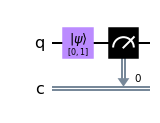

In [4]:
qc = QuantumCircuit(1,1)
qc.initialize([0,1],0)
qc.measure(0,0)
qc.draw(output='mpl')